In [20]:
# -*- coding: utf-8 -*-
#    This file is part of DEAP.
#
#    DEAP is free software: you can redistribute it and/or modify
#    it under the terms of the GNU Lesser General Public License as
#    published by the Free Software Foundation, either version 3 of
#    the License, or (at your option) any later version.
#
#    DEAP is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#    GNU Lesser General Public License for more details.
#
#    You should have received a copy of the GNU Lesser General Public
#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

#    reference:DEAp-GA-TSP:https://github.com/DEAP/deap/blob/master/examples/ga/tsp.py
import array
import random
#import json
import math
import numpy
import pandas as pd
import matplotlib.pyplot as p

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

# gr*.json contains the distance map in list of list style in JSON format
# Optimal solutions are : gr17 = 2085, gr24 = 1272, gr120 = 6942

def GetDistanceMatrix(filename):
    
    """
    load excel file with GPS data,and calculate the distance matrix
    """
    data = pd.read_excel(filename)
    distance_matrix = []
    for item1 in data.values:
        tmp_list = []
        for item2 in data.values:
            tmp_distance=math.sqrt((item1[0]-item2[0])**2+(item1[1]-item2[1])**2)     
            tmp_list.append(tmp_distance)
        distance_matrix.append(tmp_list)
    return distance_matrix

DistanceMatrix = GetDistanceMatrix('stop.xlsx')
distance_map = DistanceMatrix
IND_SIZE = 11

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
#    print individual
    return distance,

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)


random.seed(169)

pop = toolbox.population(n=100)

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)
    
result, log =    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 400, stats=stats, 
                        halloffame=hof)

print type(result)

gen	nevals	avg    	std      	min     	max     
0  	100   	0.70435	0.0786413	0.471008	0.877756
1  	80    	0.663365	0.0747302	0.489407	0.861729
2  	79    	0.645776	0.0758133	0.452868	0.85972 
3  	81    	0.632387	0.0914081	0.400731	0.902137
4  	76    	0.603423	0.0878183	0.400731	0.827354
5  	73    	0.596263	0.0885568	0.400731	0.807602
6  	68    	0.585858	0.0952861	0.400731	0.832281
7  	77    	0.577063	0.10773  	0.400731	0.879678
8  	71    	0.557432	0.0967997	0.400731	0.831121
9  	70    	0.534549	0.0996525	0.379917	0.872654
10 	77    	0.518169	0.0895648	0.400731	0.75701 
11 	71    	0.486664	0.0915641	0.400731	0.827961
12 	71    	0.460875	0.0833   	0.400731	0.81832 
13 	85    	0.436972	0.0679882	0.400731	0.6547  
14 	82    	0.419184	0.0621472	0.400731	0.742713
15 	66    	0.402641	0.00988904	0.400731	0.484766
16 	81    	0.416417	0.050242  	0.400731	0.670889
17 	86    	0.411575	0.043623  	0.400731	0.687404
18 	75    	0.405809	0.0227138 	0.400731	0.558717
19 	77    	0.416931	0.0483633 	0.40073

In [29]:
print log.select('min')

[0.47100822621378474, 0.48940663607634433, 0.45286807548510666, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.37991660534987598, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.40073079221984165, 0.4007307922

In [8]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], 'rs', alpha=alpha)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

In [9]:
best_individual = tools.selBest(result, k=1)[0]
print 'Fitness of the best individual: ', best_individual

Fitness of the best individual:  array('i', [4, 5, 10, 9, 3, 0, 2, 8, 7, 6, 1])


In [12]:
%matplotlib inline

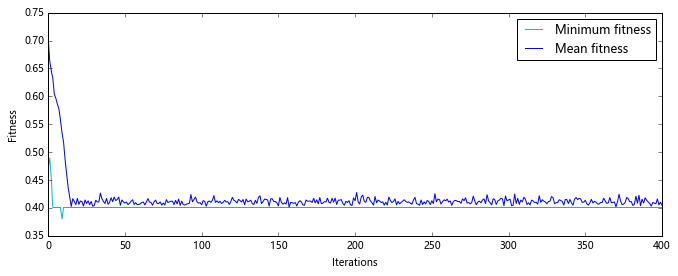

In [31]:
plt.figure(1, figsize=(11, 4), dpi=500)
plots = plt.plot(log.select('min'),'c-', log.select('avg'), 'b-', antialiased=True)
plt.legend(plots, ('Minimum fitness', 'Mean fitness'))
plt.ylabel('Fitness')
plt.xlabel('Iterations')